<a href="https://colab.research.google.com/github/cs432-websci-master/public/blob/main/Mod_03_InfoVis_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS 432/532 InfoVis with Python Tutorial

We're going to use [Seaborn](https://seaborn.pydata.org/), which is a high-level interface to the popular [Matplotlib](https://matplotlib.org/).  We'll also be using [Pandas](https://pandas.pydata.org/) to read in data from a CSV file to a dataframe (aka table) and manipulate the data.

The goal is to produce plots similar to those from the InfoVis in R tutorial. So first, upload the `midwest.csv` and `economics.csv` datasets that were created in the R tutorial to your notebook.


In [1]:
import matplotlib.pyplot as plt  # will need some Matplotlib functions
import seaborn as sns
import pandas as pd              # will use Pandas for data manipulation
sns.set_style("whitegrid");   # use white grid as default

In [2]:
midwest = pd.read_csv('midwest.csv')
midwest.head()

,Unnamed: 0,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,popother,percwhite,percblack,percamerindan,percasian,percother,popadults,perchsd,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
0,1,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,124,96.712059,2.575276,0.148283,0.376759,0.187623,43298,75.107395,19.631392,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR
1,2,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,9,66.384340,32.900433,0.178807,0.451722,0.084698,6724,59.726353,11.243308,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR
2,3,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,34,96.571276,2.861717,0.233473,0.106731,0.226803,9669,69.334988,17.033819,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR
3,4,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,1139,95.254171,0.412257,0.149322,0.486918,3.697332,19272,75.472188,17.278954,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU
4,5,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,6,90.198766,9.372858,0.239890,0.085675,0.102810,3979,68.861523,14.475999,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR


Read in the "date" column as a date.

ref: https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python/

In [4]:
economics = pd.read_csv('economics.csv', parse_dates = ['date'])
economics.head()

,Unnamed: 0,date,pce,pop,psavert,uempmed,unemploy
0,1,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,2,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,3,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,4,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,5,1967-11-01,517.4,199498.0,12.8,4.7,3066


## Things to Note

* If you're running these in a script, you'll need to include `plt.show()` at the end to actually draw the plot.  We don't need this line in the notebook.

* In Seaborn, you may need to note if the chart function returns a `FacetGrid` object or an `Axes` object.  I've tried to use the variable `g` for `FacetGrid` and `ax` for `Axes`.

## Scatterplot

Here's a basic scatterplot, showing the percentage of college educated (mapped to the y-axis) vs. the total population (mapped to the x-axis) in each county in the midwest states.

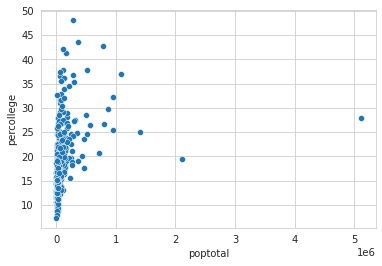

In [5]:
ax = sns.scatterplot(x="poptotal", y="percollege", data=midwest)

Now we're going to subset this and just show the counties in Ohio (state==OH). `midwest['state']` refers to the `state` column in the midwest dataset. 

We also have some adjustments to the x-axis labels and tick marks so that the population is printed with commas and everything fits.

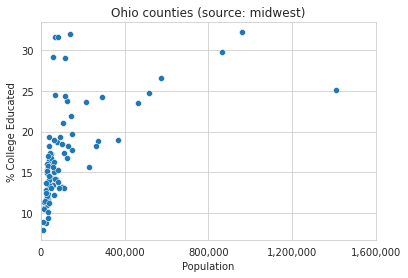

In [6]:
ax = sns.scatterplot(x="poptotal", y="percollege", data=midwest[midwest['state']=="OH"])

ax.set_xlabel ('Population')
ax.set_ylabel ('% College Educated')
ax.set_title('Ohio counties (source: midwest)')

# set x-axis parameters (to look nice)
ax.set_xlim(left=0)    # set lowest xtick at 0
ax.set_xticks(ax.get_xticks()[::2]) # use every other tick mark
ticks = ax.get_xticks()
labels = ['{:,.0f}'.format(x) for x in ticks]
ax.set_xticklabels(labels);  # using the semicolon at the end won't print output

## Bar Chart

We need to sum the population in each state.  We can use Pandas functions for this.  First, we group the population by (`groupby`) state and `sum()` the values that we're grouping.  

In [7]:
by_state = midwest.groupby('state').sum()
by_state

,Unnamed: 0,PID,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,popother,percwhite,percblack,percamerindan,percasian,percother,popadults,perchsd,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro
state,,,,,,,,,,,,,,,,,,,,,,,,,,
IL,5253,62373,3.304,11430602,288020.543030,8952978,1694273,21836,285311,476204,9685.441091,372.717549,17.732086,57.517266,66.592008,7293930,7478.700489,1916.390625,440.111253,11143856,9843.184682,1333.797490,1732.519686,1169.104246,1232.778404,28
IN,13662,65182,2.127,5544159,236727.940645,5020700,432092,12720,37617,41030,8943.056699,173.910816,20.409484,35.204495,27.418507,3489470,6749.995874,1529.292153,464.154032,5372388,8953.607679,949.296782,1207.639931,798.248542,1013.487580,37
MI,19588,102754,3.357,9295297,249897.137546,7756086,1291706,55638,104983,86884,7838.899137,254.484092,113.314600,42.070796,51.231376,5842642,6214.819863,1611.980825,388.914106,9077016,8073.497524,1180.657470,1566.749003,1062.835227,977.570778,25
OH,28292,180620,2.421,10847115,408234.101862,9521756,1154826,20358,91179,58996,8395.012258,309.281861,16.212946,38.086707,41.406228,6924764,6442.069262,1486.359445,359.043689,10574315,8555.322851,1146.910223,1562.569550,989.773297,997.240081,40
WI,28908,217188,3.286,4891769,170833.961315,4512523,244539,39387,53583,41737,6896.629559,59.155814,181.466351,40.047318,22.700959,3094226,5437.358016,1441.162412,291.228901,4754103,7011.574033,856.428805,1118.063669,751.553428,755.935035,20


Then we have to `reset_index()` to move 'state' back to a column instead of an index and then choose just 'state' and 'poptotal' columns.

In [8]:
state_pop = by_state.reset_index()[['state', 'poptotal']]
state_pop

,state,poptotal
0,IL,11430602
1,IN,5544159
2,MI,9295297
3,OH,10847115
4,WI,4891769


Then we can sort in descending order

In [9]:
state_pop.sort_values(by=['poptotal'], ascending=False, inplace=True)
state_pop

,state,poptotal
0,IL,11430602
3,OH,10847115
2,MI,9295297
1,IN,5544159
4,WI,4891769


Now we can plot with `catplot()` and `kind="bar"`

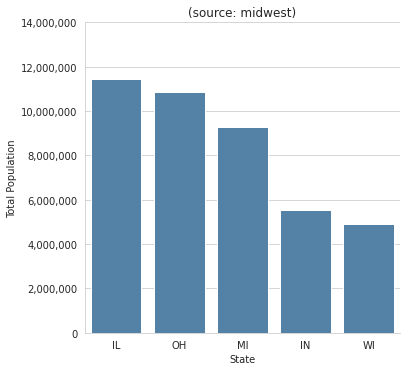

In [10]:
g = sns.catplot(x="state", y="poptotal", kind="bar", data=state_pop, color="steelblue")

g = (g.set_axis_labels ('State', 'Total Population'))
plt.title('(source: midwest)')

# format commas in ticklabels
ticks = g.axes[0][0].get_yticks()
labels = ['{:,.0f}'.format(x) for x in ticks]
g.set_yticklabels(labels);

Let's turn it sideways.  Just switch x and y axes and make the chart wider to accomodate the labels.

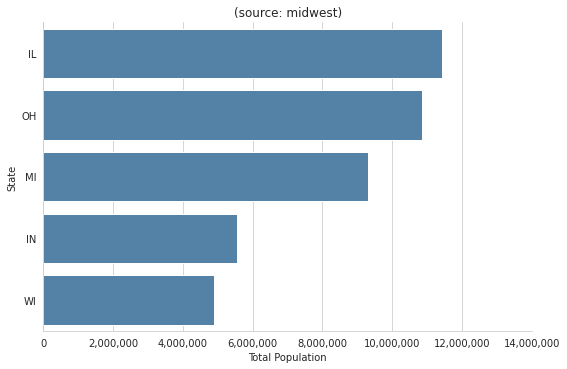

In [11]:
g = sns.catplot(y="state", x="poptotal", kind="bar", data=state_pop, color="steelblue", 
                height=5, # make the plot 5 units high
                aspect=1.5) # width should be 1.5 times height)

g = (g.set_axis_labels ('Total Population', 'State' ))
plt.title('(source: midwest)')

# format commas in ticklabels
ticks = g.axes[0][0].get_xticks()
labels = ['{:,.0f}'.format(x) for x in ticks]
g.set_xticklabels(labels);

## Line Chart

In [12]:
economics.head()

,Unnamed: 0,date,pce,pop,psavert,uempmed,unemploy
0,1,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,2,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,3,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,4,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,5,1967-11-01,517.4,199498.0,12.8,4.7,3066


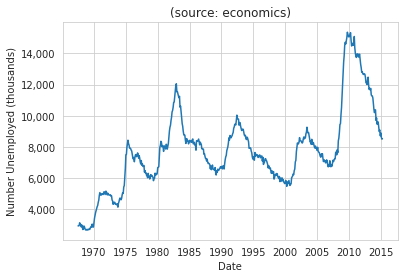

In [13]:
ax = sns.lineplot(x="date", y="unemploy", data=economics)

ax.set_xlabel ('Date')
ax.set_ylabel ('Number Unemployed (thousands)')
ax.set_title('(source: economics)')

# set ticks every 5 years, show just the year
import matplotlib.dates as mdates
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# set y-axis parameters (to look nice)
ticks = ax.get_yticks()
labels = ['{:,.0f}'.format(x) for x in ticks]
ax.set_yticklabels(labels);  

## Scatterplot Matrix

We can use the `pairplot()` function to plot a scatterplot matrix.  Instead of plotting the data in the diagonals, it plots a histogram of that attribute.

The example here goes back to the midwest dataset, selects only columns for 'area', 'poptotal', and 'popdensity'.

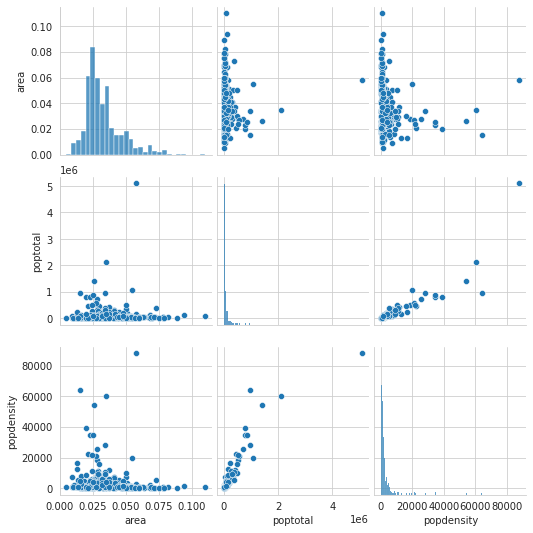

In [14]:
g = sns.pairplot(midwest, vars=['area', 'poptotal', 'popdensity'])

## Histogram

For the histogram, we show the distribution of population per county. Note that we're limiting this to counties that have less than 1 M people (in particular, Cook County, IL includes Chicago and has > 5 M people), so that skews the histogram.

*Updated Feb 2021:* The `distplot()`, which was previously used, has been deprecated.  The new function is `histplot()` and by default has `kde=False`, so I've removed that note from the explanation below.

To create the histogram, we use the `histplot()` function. We have to pass just a simple array, so we've taken the subset with population < 1M and then returned just the `poptotal` column.

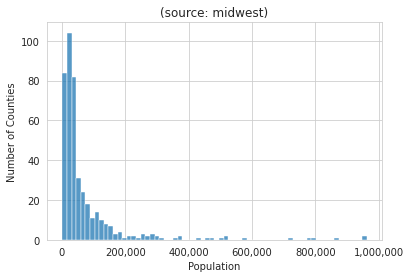

In [22]:
ax = sns.histplot(midwest[midwest['poptotal']<1000000]['poptotal']) 

ax.set_xlabel ('Population')
ax.set_ylabel ('Number of Counties')
ax.set_title('(source: midwest)')

# format commas in ticklabels
ticks = ax.get_xticks()
labels = ['{:,.0f}'.format(x) for x in ticks]
ax.set_xticklabels(labels);

We can use the `bins` option to change the number of bins in the histogram.  Note this is number of bins, not the binwidth (as we had in the R example).

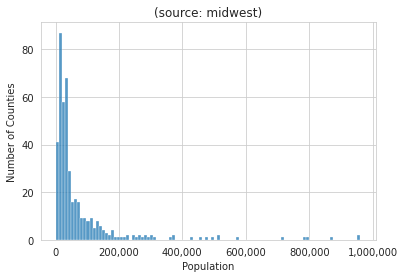

In [23]:
ax = sns.histplot(midwest[midwest['poptotal']<1000000]['poptotal'], bins=100) 

ax.set_xlabel ('Population')
ax.set_ylabel ('Number of Counties')
ax.set_title('(source: midwest)')

# format commas in ticklabels
ticks = ax.get_xticks()
labels = ['{:,.0f}'.format(x) for x in ticks]
ax.set_xticklabels(labels);

## Boxplot

We're again looking at the total population by county in the midwest (and again, only for counties with < 1M people). This time, we'll use boxplots and create a separate boxplot for each state. 

The code is very similar to the bar chart.  We use `catplot()`, specify `kind="box"`, and use the midwest dataset (filtered to counties with < 1M people) instead of the state_pop dataset that we'd created for the bar chart.

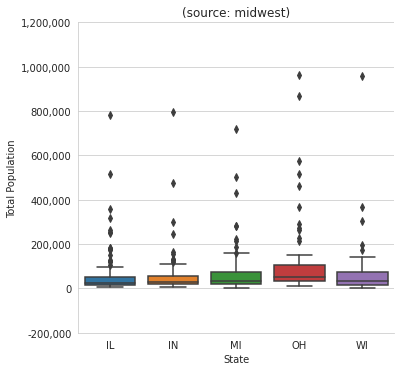

In [17]:
g = sns.catplot(x="state", y="poptotal", kind="box", data=midwest[midwest['poptotal']<1000000]) 

g = (g.set_axis_labels ('State', 'Total Population'))
plt.title('(source: midwest)')

# format commas in ticklabels
ticks = g.axes[0][0].get_yticks()
labels = ['{:,.0f}'.format(x) for x in ticks]
g.set_yticklabels(labels);

## Empirical CDF (ECDF)

*Updated Feb 2021:* Seaborn has added a `ecdfplot()` function. I've added this example, along with leaving in the `scatter()` and `sns.lineplot()` examples below.

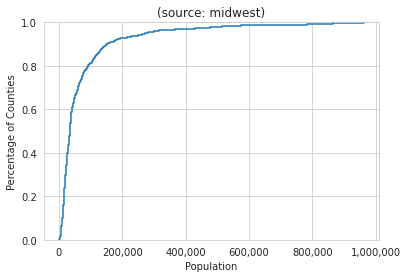

In [25]:
ax = sns.ecdfplot(midwest[midwest['poptotal']<1000000]['poptotal']) 

ax.set_xlabel ('Population')
ax.set_ylabel ('Percentage of Counties')
ax.set_title('(source: midwest)')

# format commas in ticklabels
ticks = ax.get_xticks()
labels = ['{:,.0f}'.format(x) for x in ticks]
ax.set_xticklabels(labels);

Code showing how to compute an ECDF and plot it with scatter() is available at https://cmdlinetips.com/2019/05/empirical-cumulative-distribution-function-ecdf-in-python/

*Preparing the data*

In [18]:
import numpy as np  # use for sort() and arrange() to build the ECDF
pop_data = midwest[midwest['poptotal']<1000000]['poptotal']
x = np.sort(pop_data)
n = x.size
y = np.arange(1, n+1) / n

Drawing the chart with `scatter()`

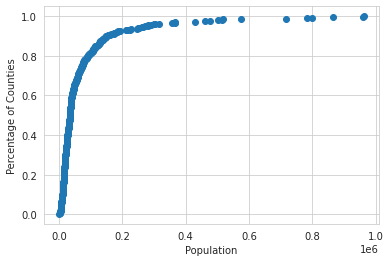

In [19]:
plt.scatter(x=x, y=y);
plt.xlabel('Population')
plt.ylabel('Percentage of Counties');

Here's an example of how to do the same thing with Seaborn's `lineplot()` to include the line and points.

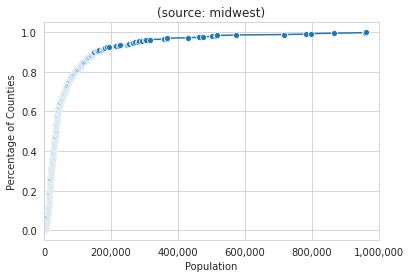

In [20]:
ax = sns.lineplot(x=x, y=y, marker="o")

ax.set_xlabel ('Population')
ax.set_ylabel ('Percentage of Counties')
ax.set_title('(source: midwest)')

# set x-axis parameters (to look nice)
ax.set_xlim(left=0, right=1000000)    # set lowest xtick at 0, max at 1M
ticks = ax.get_xticks()
labels = ['{:,.0f}'.format(x) for x in ticks]
ax.set_xticklabels(labels);  # using the semicolon at the end won't print output